In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Techniques to handle Imbalanced Dataset
- Over Sampling
- Under Sampling

In [2]:
data = pd.read_csv("data/creditcard.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
data['Class'].unique()

array([0, 1])

In [6]:
data.groupby(['Class'])['Class'].count()

Class
0    284315
1       492
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc55c5e10d0>,
 [Text(-1.09998380137016, 0.0059696501784341355, '0'),
  Text(1.0999838018177286, -0.005969567707642625, '1')],
 [Text(-0.5999911643837235, 0.0032561728246004373, '99.8%'),
  Text(0.5999911646278518, -0.0032561278405323405, '0.2%')])

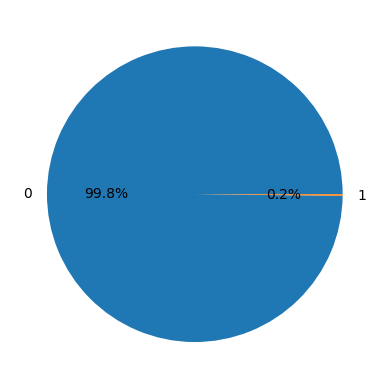

In [10]:
fig, ax = plt.subplots()
ax.pie(data.groupby(['Class'])['Class'].count(), labels=data['Class'].unique(), autopct='%1.1f%%')

In [12]:
X = data.drop(columns=['Class'])
y = data.Class

In [15]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44
138452,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.157534,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,-0.295730,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.007155,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,0.417396,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00


In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [17]:
from sklearn.model_selection import KFold, GridSearchCV
cv = KFold(n_splits=5, shuffle=False)
params = {'C': 10.0**np.arange(-2, 3), 'penalty': ['l1', 'l2']}
grid = GridSearchCV(LR, params, cv=cv, n_jobs=-1, scoring='f1_macro')
grid.fit(X_train,y_train)


/Users/joeljoseph26/Documents/Education/Machine_and_Deep_Learning/ML-DL-projects/Classification-Projects/Classification-Projects/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joeljoseph26/Documents/Education/Machine_and_Deep_Learning/ML-DL-projects/Classification-Projects/Classification-Projects/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [18]:
grid.best_score_

0.8573539627326836

In [20]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [22]:
LR = LogisticRegression(C=1,penalty='l2')
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

/Users/joeljoseph26/Documents/Education/Machine_and_Deep_Learning/ML-DL-projects/Classification-Projects/Classification-Projects/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9986306660580738
0.5612244897959183
[[56829    43]
 [   35    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.56      0.61      0.59        90

    accuracy                           1.00     56962
   macro avg       0.78      0.81      0.79     56962
weighted avg       1.00      1.00      1.00     56962



In [32]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(class_weight= {0:1,1:100})

In [34]:
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)


In [35]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9995786664794073
0.7653061224489796
[[56863    23]
 [    1    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.77      0.99      0.86        76

    accuracy                           1.00     56962
   macro avg       0.88      0.99      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## Under Sampling

#### NearMiss

In [74]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids, CondensedNearestNeighbour
from imblearn.under_sampling import AllKNN, EditedNearestNeighbours, InstanceHardnessThreshold, TomekLinks
from imblearn.under_sampling import NeighbourhoodCleaningRule, OneSidedSelection, RepeatedEditedNearestNeighbours


In [42]:
nm = NearMiss(sampling_strategy=0.8)
x_train_new, y_train_new = nm.fit_resample(X_train,y_train)

In [43]:
from collections import Counter
print(Counter(y_train),Counter(y_train_new))

Counter({0: 227451, 1: 394}) Counter({0: 492, 1: 394})


In [75]:
nm = NearMiss(sampling_strategy='majority')
x_train_new_nm, y_train_new_nm = nm.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(y_train_new_nm))

Counter({0: 227451, 1: 394}) Counter({0: 394, 1: 394})


#### RandomUnderSampler

In [47]:
random_under = RandomUnderSampler(sampling_strategy='majority')
x_train_new_random, y_train_new_random = random_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(y_train_new_random))

Counter({0: 227451, 1: 394}) Counter({0: 394, 1: 394})


In [76]:
random_under = RandomUnderSampler(sampling_strategy=0.7)
x_train_new_random, y_train_new_random = random_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(y_train_new_random))

Counter({0: 227451, 1: 394}) Counter({0: 562, 1: 394})


#### NeighbourhoodCleaningRule

In [83]:
ncr_under = NeighbourhoodCleaningRule(sampling_strategy='not minority')
x_train_new_ncr_under, y_train_new_ncr_under = ncr_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(y_train_new_ncr_under))

Counter({0: 227451, 1: 394}) Counter({0: 226526, 1: 394})


In [82]:
ncr_under = NeighbourhoodCleaningRule(sampling_strategy='all')
x_train_new_ncr_under, y_train_new_ncr_under = ncr_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(y_train_new_ncr_under))
#'not minority', 'not majority', 'majority', 'all', 'auto'

Counter({0: 227451, 1: 394}) Counter({0: 226526, 1: 39})


#### OneSidedSelection

In [84]:
oss_under = OneSidedSelection(sampling_strategy='not minority')
x_train_new_oss_under, y_train_new_oss_under = oss_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(y_train_new_oss_under))

Counter({0: 227451, 1: 394}) Counter({0: 227105, 1: 394})


In [93]:
oss_under = OneSidedSelection()
x_train_new_oss_under, y_train_new_oss_under = oss_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(y_train_new_oss_under))

Counter({0: 227451, 1: 394}) Counter({0: 225023, 1: 394})


#### RepeatedEditedNearestNeighbours

In [94]:
renn_under = RepeatedEditedNearestNeighbours()
x_train_new_renn_under, y_train_new_renn_under = renn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(y_train_new_renn_under))

Counter({0: 227451, 1: 394}) Counter({0: 226921, 1: 394})


In [95]:
renn_under = RepeatedEditedNearestNeighbours(sampling_strategy='not minority')
x_train_new_renn_under, y_train_new_renn_under = renn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(y_train_new_renn_under))

Counter({0: 227451, 1: 394}) Counter({0: 226921, 1: 394})


In [96]:
renn_under = RepeatedEditedNearestNeighbours(sampling_strategy='all')
x_train_new_renn_under, y_train_new_renn_under = renn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(y_train_new_renn_under))

Counter({0: 227451, 1: 394}) Counter({0: 227101, 1: 19})


#### AllKNN

In [97]:
aknn_under = AllKNN(sampling_strategy='all')
x_train_new_aknn_under, y_train_new_aknn_under = aknn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(x_train_new_aknn_under))

Counter({0: 227451, 1: 394}) Counter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


In [98]:
aknn_under = AllKNN(sampling_strategy='not minority')
x_train_new_renn_under, y_train_new_renn_under = aknn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(x_train_new_aknn_under))

Counter({0: 227451, 1: 394}) Counter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


In [99]:
aknn_under = AllKNN()
x_train_new_aknn_under, y_train_new_aknn_under = aknn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(x_train_new_aknn_under))

Counter({0: 227451, 1: 394}) Counter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


#### EditedNearestNeighbours

In [100]:
aknn_under = EditedNearestNeighbours()
x_train_new_aknn_under, y_train_new_aknn_under = aknn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(x_train_new_aknn_under))

Counter({0: 227451, 1: 394}) Counter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


In [101]:
aknn_under = EditedNearestNeighbours(sampling_strategy='not minority')
x_train_new_aknn_under, y_train_new_aknn_under = aknn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(x_train_new_aknn_under))

Counter({0: 227451, 1: 394}) Counter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


#### InstanceHardnessThreshold

In [102]:
aknn_under = InstanceHardnessThreshold()
x_train_new_aknn_under, y_train_new_aknn_under = aknn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(x_train_new_aknn_under))

Counter({0: 227451, 1: 394}) Counter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


In [103]:
aknn_under = InstanceHardnessThreshold(sampling_strategy='not minority')
x_train_new_aknn_under, y_train_new_aknn_under = aknn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(x_train_new_aknn_under))

Counter({0: 227451, 1: 394}) Counter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


#### TomekLinks

In [104]:
aknn_under = TomekLinks()
x_train_new_aknn_under, y_train_new_aknn_under = aknn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(x_train_new_aknn_under))

Counter({0: 227451, 1: 394}) Counter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


In [105]:
aknn_under = TomekLinks(sampling_strategy='majority')
x_train_new_aknn_under, y_train_new_aknn_under = aknn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(x_train_new_aknn_under))

Counter({0: 227451, 1: 394}) Counter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


#### ClusterCentroids

In [106]:
from sklearn.cluster import MiniBatchKMeans
aknn_under = ClusterCentroids(estimator=MiniBatchKMeans(n_clusters=1,n_init=1, random_state=0))
x_train_new_aknn_under, y_train_new_aknn_under = aknn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(x_train_new_aknn_under))

Counter({0: 227451, 1: 394}) Counter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


In [107]:
aknn_under = ClusterCentroids(estimator=MiniBatchKMeans(n_clusters=1,n_init=1, random_state=0), sampling_strategy='majority')
x_train_new_aknn_under, y_train_new_aknn_under = aknn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(x_train_new_aknn_under))

Counter({0: 227451, 1: 394}) Counter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


#### CondensedNearestNeighbour

In [108]:
aknn_under = CondensedNearestNeighbour()
x_train_new_aknn_under, y_train_new_aknn_under = aknn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(x_train_new_aknn_under))

Counter({0: 227451, 1: 394}) Counter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


In [109]:
aknn_under = CondensedNearestNeighbour(sampling_strategy='majority')
x_train_new_aknn_under, y_train_new_aknn_under = aknn_under.fit_resample(X_train,y_train)
print(Counter(y_train),Counter(x_train_new_aknn_under))

Counter({0: 227451, 1: 394}) Counter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


## Over Sampling

In [63]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTENC, SMOTEN, SVMSMOTE
from imblearn.over_sampling import KMeansSMOTE, ADASYN, BorderlineSMOTE

#### RandomOverSampler

In [49]:
random_over = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = random_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_over))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 227451})


In [50]:
random_over = RandomOverSampler(sampling_strategy=0.6)
X_over, y_over = random_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_over))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 136470})


#### SMOTE

In [51]:
smote_over = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_smote))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 227451})


In [53]:
smote_over = SMOTE(sampling_strategy=0.7)
X_smote, y_smote = smote_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_smote))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 159215})


#### SMOTEN

In [56]:
smoten_over = SMOTEN(sampling_strategy='minority')
X_smoten, y_smoten = smoten_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_smoten))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 227451})


In [57]:
smoten_over = SMOTEN(sampling_strategy=0.6)
X_smoten, y_smoten = smoten_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_smoten))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 136470})


#### SMOTENC

In [ ]:
smotenc_over = SMOTENC(sampling_strategy='minority')
X_smotenc, y_smotenc = smotenc_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_smotenc))

In [ ]:
smotenc_over = SMOTENC(sampling_strategy=0.8)
X_smotenc, y_smotenc = smotenc_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_smotenc))

#### SVMSMOTE

In [59]:
svmsmote_over = SVMSMOTE(sampling_strategy='minority')
X_smotenc, y_svmsmote = svmsmote_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_svmsmote))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 227451})


In [60]:
svmsmote_over = SVMSMOTE(sampling_strategy=0.7)
X_smotenc, y_svmsmote = svmsmote_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_svmsmote))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 159215})


#### K-MeansSMOTE

In [68]:
from sklearn.cluster import MiniBatchKMeans
kmeanssmote_over = KMeansSMOTE(kmeans_estimator=MiniBatchKMeans(n_clusters=1, n_init=1, random_state=0), 
                               random_state=42,sampling_strategy='minority')
X_kmeanssmote, y_kmeanssmote = kmeanssmote_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_kmeanssmote))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 227451})


In [69]:
kmeanssmote_over = KMeansSMOTE(kmeans_estimator=MiniBatchKMeans(n_clusters=1, n_init=1, random_state=0), 
                               random_state=42, sampling_strategy=0.9)
X_smotenc, y_kmeanssmote = kmeanssmote_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_kmeanssmote))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 204705})


#### ADASYN

In [70]:
adasyn_over = ADASYN(sampling_strategy=0.9)
X_adasyn, y_adasyn = adasyn_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_adasyn))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 204805})


In [71]:
adasyn_over = ADASYN(sampling_strategy='minority')
X_adasyn, y_adasyn = adasyn_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_adasyn))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 227373})


#### BorderlineSMOTE

In [72]:
BorderlineSMOTE_over = BorderlineSMOTE(sampling_strategy='minority')
X_BorderlineSMOTE, y_BorderlineSMOTE = BorderlineSMOTE_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_BorderlineSMOTE))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 227451})


In [73]:
BorderlineSMOTE_over = BorderlineSMOTE(sampling_strategy=0.7)
X_BorderlineSMOTE, y_BorderlineSMOTE = BorderlineSMOTE_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_BorderlineSMOTE))

Counter({0: 227451, 1: 394}) Counter({0: 227451, 1: 159215})


## Both over and under sampling

#### SMOTETomek

In [110]:
from imblearn.combine import  SMOTEENN, SMOTETomek
SMOTETomek_over = SMOTETomek()
X_SMOTETomek_over, y_SMOTETomek_over = SMOTETomek_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_SMOTETomek_over))

Counter({0: 227451, 1: 394}) Counter({0: 226830, 1: 226830})


In [111]:
SMOTETomek_over = SMOTETomek(sampling_strategy=0.7)
X_SMOTETomek_over, y_SMOTETomek_over = SMOTETomek_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_SMOTETomek_over))

Counter({0: 227451, 1: 394}) Counter({0: 226695, 1: 158459})


In [112]:
SMOTETomek_over = SMOTETomek(sampling_strategy='all')
X_SMOTETomek_over, y_SMOTETomek_over = SMOTETomek_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_SMOTETomek_over))

Counter({0: 227451, 1: 394}) Counter({0: 226812, 1: 226812})


#### SMOTEENN

In [113]:
SMOTETomek_over = SMOTEENN()
X_SMOTETomek_over, y_SMOTETomek_over = SMOTETomek_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_SMOTETomek_over))

Counter({0: 227451, 1: 394}) Counter({1: 218556, 0: 209984})


In [114]:
SMOTETomek_over = SMOTEENN(sampling_strategy=0.8)
X_SMOTETomek_over, y_SMOTETomek_over = SMOTETomek_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_SMOTETomek_over))

Counter({0: 227451, 1: 394}) Counter({0: 210918, 1: 172461})


In [115]:
SMOTETomek_over = SMOTEENN(sampling_strategy='all')
X_SMOTETomek_over, y_SMOTETomek_over = SMOTETomek_over.fit_resample(X_train, y_train)
print(Counter(y_train),Counter(y_SMOTETomek_over))

Counter({0: 227451, 1: 394}) Counter({1: 218485, 0: 210002})


## Ensemble Methods

#### EasyClassifier

In [116]:
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
classifier = EasyEnsembleClassifier(sampling_strategy='not majority')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9991397773954567
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.68      0.79      0.73        85

    accuracy                           1.00     56962
   macro avg       0.84      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962

[[56846    31]
 [   18    67]]


In [118]:
classifier = EasyEnsembleClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9661704294090797
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     54949
           1       0.94      0.05      0.09      2013

    accuracy                           0.97     56962
   macro avg       0.95      0.52      0.53     56962
weighted avg       0.97      0.97      0.95     56962

[[54943     6]
 [ 1921    92]]


#### Balanced Random Forest Classifier

In [120]:
classifier = BalancedRandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/Users/joeljoseph26/Documents/Education/Machine_and_Deep_Learning/ML-DL-projects/Classification-Projects/Classification-Projects/env/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/joeljoseph26/Documents/Education/Machine_and_Deep_Learning/ML-DL-projects/Classification-Projects/Classification-Projects/env/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/joeljoseph26/Documents/Education/Machine_and_Deep_Learning/ML-DL-projects/Classification-Project

In [121]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.975035988904884
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     55458
           1       0.92      0.06      0.11      1504

    accuracy                           0.98     56962
   macro avg       0.95      0.53      0.55     56962
weighted avg       0.97      0.98      0.96     56962

[[55450     8]
 [ 1414    90]]


In [123]:
classifier = EasyEnsembleClassifier(sampling_strategy='majority', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9659246515220673
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     54937
           1       0.93      0.04      0.09      2025

    accuracy                           0.97     56962
   macro avg       0.95      0.52      0.53     56962
weighted avg       0.96      0.97      0.95     56962

[[54930     7]
 [ 1934    91]]


In [125]:
classifier = EasyEnsembleClassifier(sampling_strategy='all', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9659246515220673
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     54937
           1       0.93      0.04      0.09      2025

    accuracy                           0.97     56962
   macro avg       0.95      0.52      0.53     56962
weighted avg       0.96      0.97      0.95     56962

[[54930     7]
 [ 1934    91]]


#### Balanced Bagging Classifier

In [127]:
classifier = BalancedBaggingClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [128]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9761244338330817
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     55516
           1       0.94      0.06      0.12      1446

    accuracy                           0.98     56962
   macro avg       0.96      0.53      0.55     56962
weighted avg       0.98      0.98      0.97     56962

[[55510     6]
 [ 1354    92]]


#### RUSBoost Classifier

In [129]:
classifier = RUSBoostClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.951985534215793
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     54141
           1       0.94      0.03      0.06      2821

    accuracy                           0.95     56962
   macro avg       0.95      0.52      0.52     56962
weighted avg       0.95      0.95      0.93     56962

[[54135     6]
 [ 2729    92]]
